In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

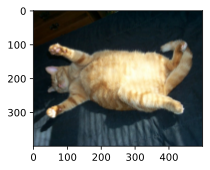

In [3]:
d2l.set_figsize()
img = d2l.Image.open('./cat1.jpg')
d2l.plt.imshow(img);

大多数图像增广方法都具有一定的随机性。
为了便于观察图像增广的效果，我们下面定义辅助函数apply。 
此函数在输入图像img上多次运行图像增广方法aug并显示所有结果。

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

## 翻转和裁剪


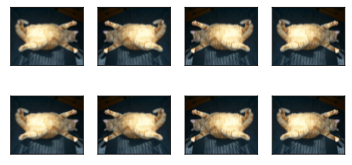

In [5]:
# 水平翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

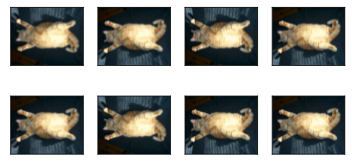

In [6]:
# 竖直翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

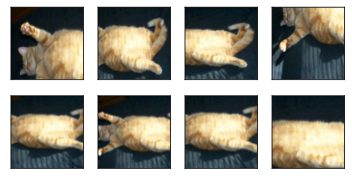

In [7]:
# 随机裁剪一个原始面积为10%到100%的图像，区域宽高比为0.5到2，区域宽高缩放到200像素
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## 改变颜色
颜色分为四个方面：亮度、对比度、饱和度、色调

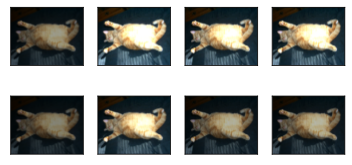

In [8]:
# 随机更改图像的亮度，随机值为原始图像的50%（1-0.5）到150%（1+0.5）之间。
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

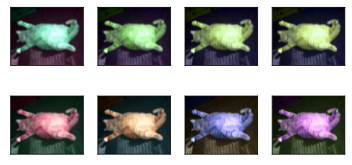

In [9]:
# 随机更改色调
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

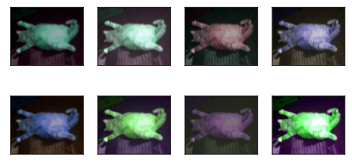

In [10]:
# 同时随机更改图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 结合多种图片增广方式

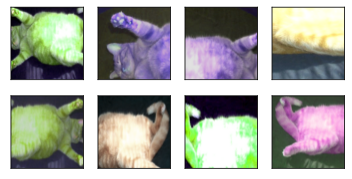

In [11]:
# 结合上面翻转、改变颜色、缩放
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

## 使用图像增广训练数据

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data\cifar-10-python.tar.gz to ../data


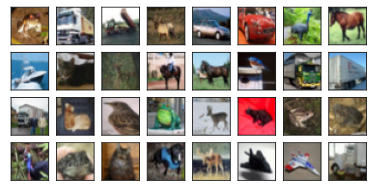

In [12]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
                                          download=True)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8);

In [ ]:
# 只对训练集进行增广，且只进行水平翻转
train_augs = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])

In [ ]:
# 定义读取数据集函数
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root="../data", train=is_train,
                                           transform=augs, download=True)  # transform参数用于对图片进行增广
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                    shuffle=is_train, num_workers=d2l.get_dataloader_workers())
    return dataloader